In [1]:
import numpy as np
import networkx as nx
from copy import deepcopy

import network_utils as nu

INTENSITY_FILE = 'intensity.csv'

# Init topology

In [2]:
INIT_MPK = 5
graph, intensity_matrix = nu.init_topology(INTENSITY_FILE, INIT_MPK)
nu.overview(graph, show=False)

Topology overview
     Number of nodes: 20
     Number of edges: 29
     Is connected: True
     Isolated nodes: 0
     Capacity > intensity = True


# Network testing

For all tests: maximum network latency: $3 * T_{init}$, where $T_{init} \equiv$ _base network latency for the given intensity matrix_ $I$

In [3]:
# Utils
T_MAX = 3 * nu.T(graph, intensity_matrix.sum(), INIT_MPK)

def _full(value, range_: np.array) -> np.array:
    return np.full(shape=range_.shape, fill_value=value)

**1. Initial test:**
   * Edge reliability: $p = 0.99$
   * Mean package size: $m = 5$

In [4]:
nu.reliability(graph=graph, 
               intensity_matrix=intensity_matrix, 
               T_max=T_MAX, 
               p=0.99, 
               mean_package_size=INIT_MPK)

{'passed': 0.997, 'incoherent': 0.0, 'overload': 0.003, 'delay': 0.0}

**2. Increasing intensity:**

Running the reliability test on the given topology while increasing the values in the intensity matrix in each iteration

In [5]:
range_ = np.arange(intensity_matrix.max() * 2)
r = {}
for delta in range_:
    im_cpy = intensity_matrix + delta
    np.fill_diagonal(im_cpy, 0)

    r[delta] = nu.reliability(graph=graph, 
                              intensity_matrix=im_cpy, 
                              T_max=T_MAX, 
                              p=0.99, 
                              mean_package_size=INIT_MPK)

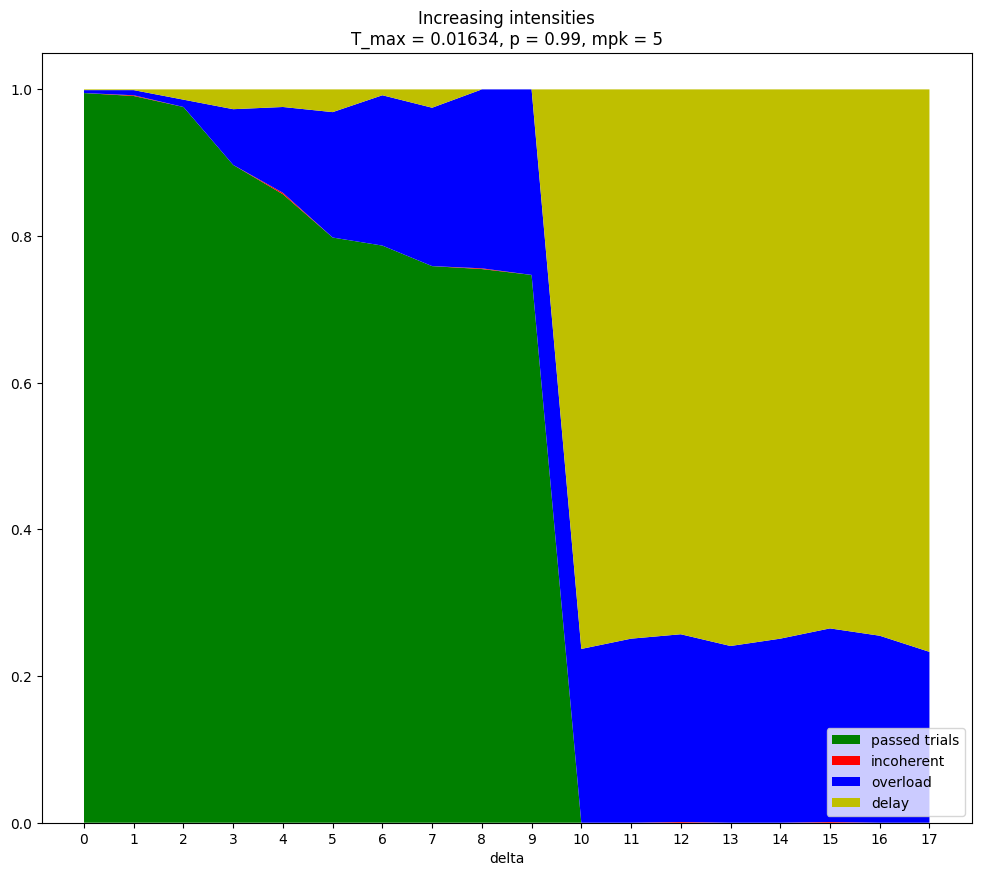

In [6]:
nu.plot_results(results=r, 
                title="Increasing intensities",
                constants=f"T_max = {round(T_MAX, 5)}, p = {0.99}, mpk = {INIT_MPK}",
                x_label="delta")

**3. Increasing capacity:**

Running the reliability test on the given topology while increasing the network's edge capacity values

In [7]:
g = deepcopy(graph)
range_ = np.arange(1, 5.5, step=0.5)
r = {}

for factor in range_:
    g = nu.set_edge_capacities(g, mean_package_size=INIT_MPK, factor=factor)
    r[factor] = nu.reliability(graph=g, 
                               intensity_matrix=intensity_matrix, 
                               T_max=T_MAX, 
                               p=0.99, 
                               mean_package_size=INIT_MPK)

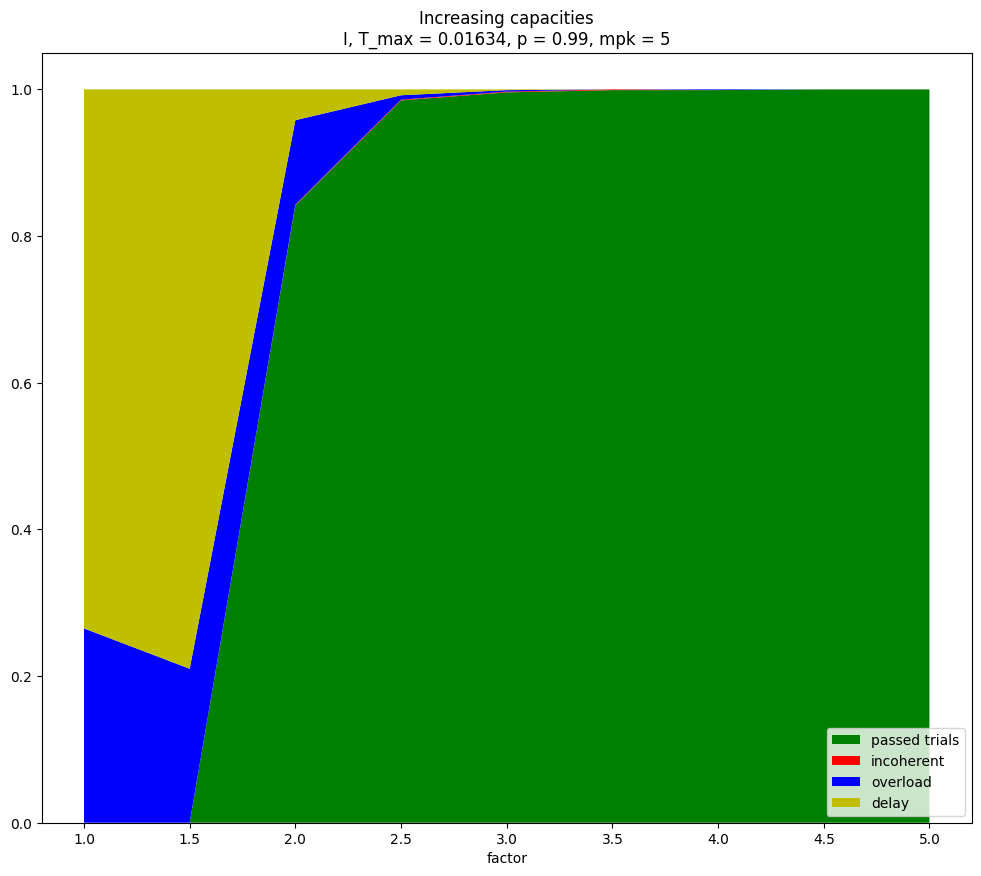

In [8]:
nu.plot_results(results=r, 
                title="Increasing capacities",
                constants=f"I, T_max = {round(T_MAX, 5)}, p = {0.99}, mpk = {INIT_MPK}",
                x_label="factor")

**4. New edges:**

Running the reliability test on the given topology while adding new edges to the network

In [9]:
g = deepcopy(graph)
new_edges = [None, (0, 19), (8, 9), (1, 5), (2, 6), (3, 7), (4, 8)]
r = {}

for i, edge in enumerate(new_edges):
    if edge: g.add_edge(*edge)

    g = nu.set_edge_intensities(g, intensity_matrix)
    g = nu.set_edge_capacities(g, mean_package_size=INIT_MPK)

    r[i] = nu.reliability(graph=g, 
                          intensity_matrix=intensity_matrix, 
                          T_max=T_MAX, 
                          p=0.99, 
                          mean_package_size=INIT_MPK)

Topology overview
     Number of nodes: 20
     Number of edges: 35
     Is connected: True
     Isolated nodes: 0
     Capacity > intensity = True


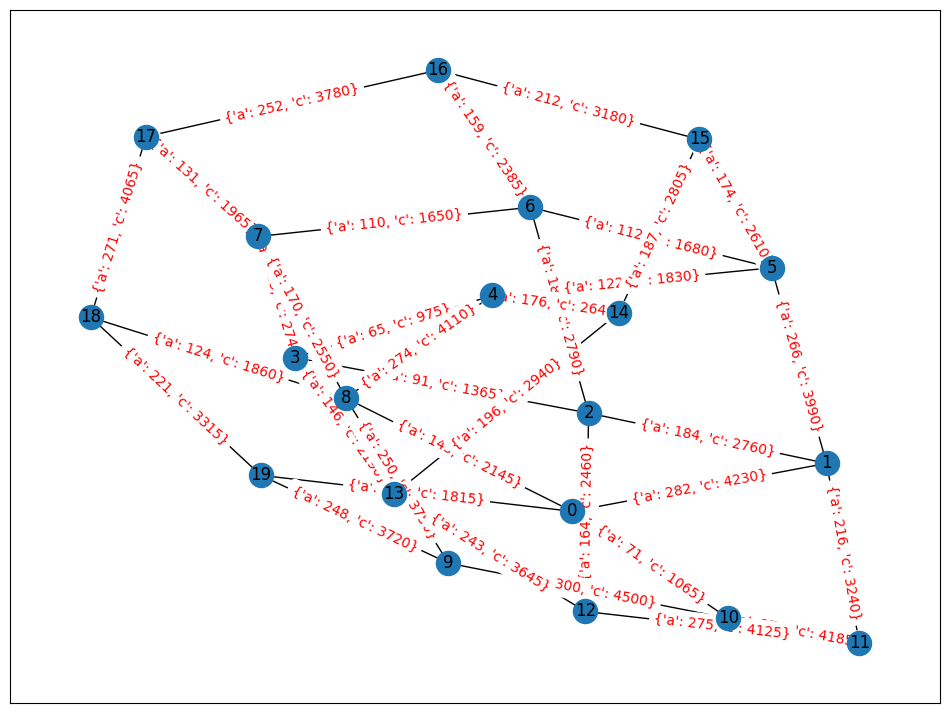

In [10]:
nu.overview(g, show=True)

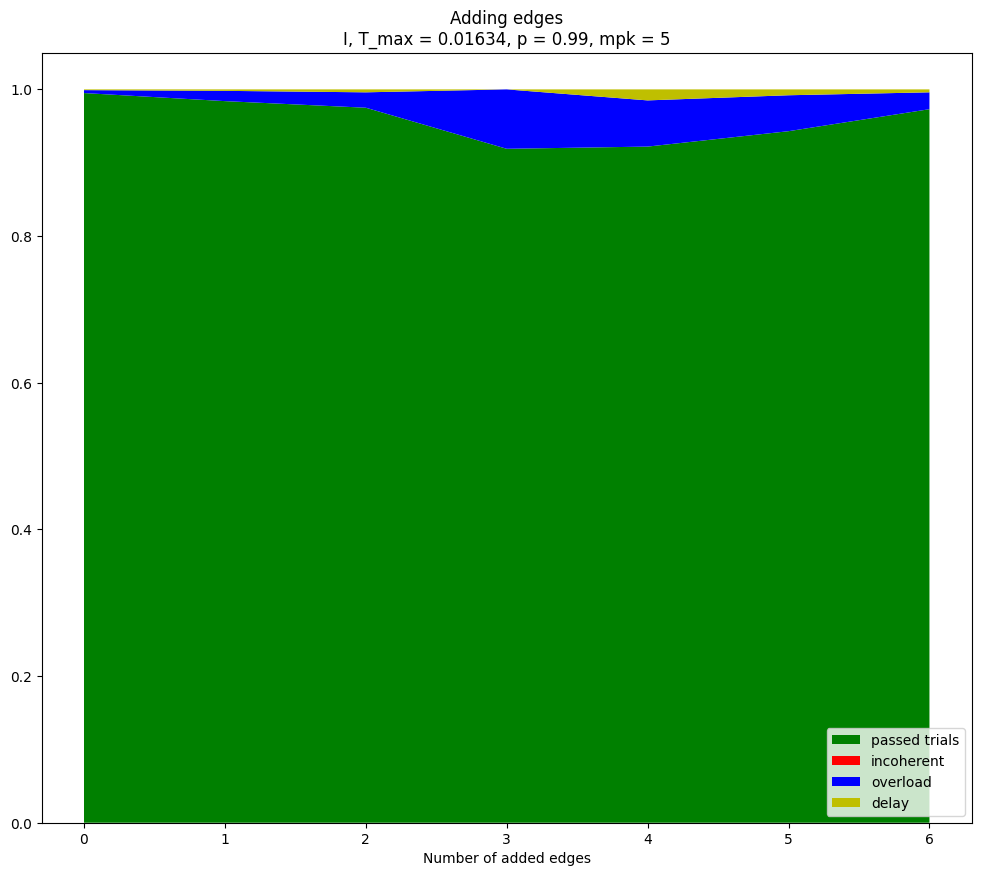

In [11]:
nu.plot_results(results=r, 
                title="Adding edges",
                constants=f"I, T_max = {round(T_MAX, 5)}, p = {0.99}, mpk = {INIT_MPK}",
                x_label="Number of added edges")